In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sentiment_analysis import *

In [2]:
# load data
df_trump_2016 = pd.read_csv("Data/2016/trump_2016.zip", compression="zip")
df_trump_2020 = pd.read_csv("Data/2020/trump_2020.zip", compression="zip")
df_clinton_2016 = pd.read_csv("Data/2016/clinton_2016.zip", compression="zip")
df_biden_2020 = pd.read_csv("Data/2020/biden_2020.zip", compression="zip")

In [3]:
# Read the first 10000 quotations and store them in a datafram
to_sample = 10
chunk_size = 10000
year = 2016

df_trump_2016_sa = expand_quotations_with_polarity_subjectivity(df_trump_2016)
df_trump_2020_sa = expand_quotations_with_polarity_subjectivity(df_trump_2020)
df_clinton_2016_sa = expand_quotations_with_polarity_subjectivity(df_clinton_2016)
df_biden_2020_sa = expand_quotations_with_polarity_subjectivity(df_biden_2020)

df_trump_2016_sa.head()

,Unnamed: 0,Unnamed: 0.1,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,month,type,candidate,quotation_polarity,quotation_subjectivity
0,3,1709,2016-07-07-033290,I didn't want to delete it -- I would have nev...,Donald J. Trump,['Q22686'],2016-07-07 01:49:02,4,"[['Donald J. Trump', '0.7791'], ['None', '0.21...",['http://mobile.nytimes.com/2016/07/07/us/poli...,E,Jul,NY Times,Donald Trump,0.00,0.0000
1,9,6715,2016-07-25-126140,"Wow, the Republican Convention went so smoothl...",Donald Trump,"['Q22686', 'Q27947481']",2016-07-25 00:00:00,171,"[['Donald Trump', '0.8662'], ['None', '0.1103'...",['http://dailyherald.com/article/20160725/news...,E,Jul,NY Times,Donald Trump,0.15,0.5875
2,11,7112,2016-08-09-004561,"Although, the Second Amendment people -- maybe...",Donald Trump,"['Q22686', 'Q27947481']",2016-08-09 00:00:00,1183,"[['Donald Trump', '0.6569'], ['None', '0.2428'...",['http://onenewspage.com/video/20160809/525505...,E,Aug,NY Times,Donald Trump,0.00,0.0000
3,15,11168,2016-09-07-092168,She's totally unfit to be our commander in chief.,Donald J. Trump,['Q22686'],2016-09-07 16:38:49,2,"[['Donald J. Trump', '0.4223'], ['Donald Trump...",['http://www.nytimes.com/2016/09/08/us/politic...,E,Sep,NY Times,Donald Trump,0.00,0.7500
4,16,13945,2016-09-07-003185,A Trump supporter is fighting against just abo...,Brad Pitt,"['Q35332', 'Q373912']",2016-09-07 10:34:00,16,"[['Brad Pitt', '0.3934'], ['None', '0.349'], [...",['http://eonline.com/news/792842/brad-pitt-wei...,E,Sep,NY Times,Donald Trump,0.00,0.0000


## Plot the frequency distributions of polarity and subjectivity

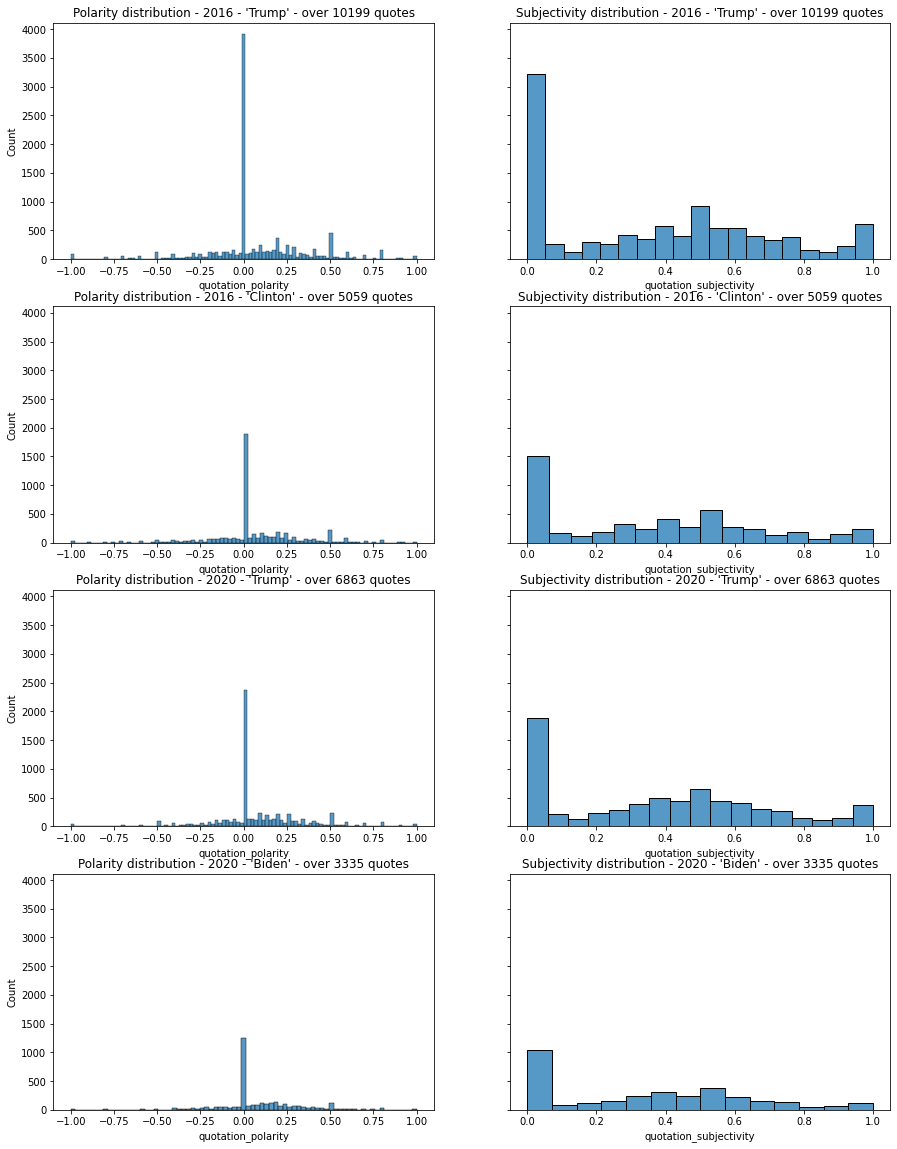

In [4]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20), sharey=True)

sns.histplot(df_trump_2016_sa['quotation_polarity'], ax=axes[0][0])
axes[0][0].set_title(f'Polarity distribution - 2016 - \'Trump\' - over {len(df_trump_2016_sa)} quotes')
sns.histplot(df_trump_2016_sa['quotation_subjectivity'], ax=axes[0][1])
axes[0][1].set_title(f'Subjectivity distribution - 2016 - \'Trump\' - over {len(df_trump_2016_sa)} quotes')

sns.histplot(df_clinton_2016_sa['quotation_polarity'], ax=axes[1][0])
axes[1][0].set_title(f'Polarity distribution - 2016 - \'Clinton\' - over {len(df_clinton_2016_sa)} quotes')
sns.histplot(df_clinton_2016_sa['quotation_subjectivity'], ax=axes[1][1])
axes[1][1].set_title(f'Subjectivity distribution - 2016 - \'Clinton\' - over {len(df_clinton_2016_sa)} quotes')

sns.histplot(df_trump_2020_sa['quotation_polarity'], ax=axes[2][0])
axes[2][0].set_title(f'Polarity distribution - 2020 - \'Trump\' - over {len(df_trump_2020_sa)} quotes')
sns.histplot(df_trump_2020_sa['quotation_subjectivity'], ax=axes[2][1])
axes[2][1].set_title(f'Subjectivity distribution - 2020 - \'Trump\' - over {len(df_trump_2020_sa)} quotes')

sns.histplot(df_biden_2020_sa['quotation_polarity'], ax=axes[3][0])
axes[3][0].set_title(f'Polarity distribution - 2020 - \'Biden\' - over {len(df_biden_2020_sa)} quotes')
sns.histplot(df_biden_2020_sa['quotation_subjectivity'], ax=axes[3][1])
axes[3][1].set_title(f'Subjectivity distribution - 2020 - \'Biden\' - over {len(df_biden_2020_sa)} quotes')

fig.savefig('Data/Visualization/Frequency_Distribution_Of_Polarity_Subjectivity_Trump_Clinton_Biden_Quotes.png', transparent=True)

## Timeline of polarity and subjectivity distribution

In [173]:
def preprocess_data_for_visualisation(df_candidates, months, candidates, subjectivity=False):
    # TODO find a better way I guess ?

    metric = 'polarity'
    if subjectivity:
        metric = 'subjectivity'

    tmp = df_candidates[['month', f'quotation_{metric}']].groupby([df_candidates.month, df_candidates.candidate]).mean()[f'quotation_{metric}']
    cross = []
    for candidate in candidates:
        for month in months:
            cross.append([candidate, month])

    tmp = pd.DataFrame([[month, tmp.at[month][candidate], candidate] for candidate, month in cross], columns=['month', f'quotation_{metric}', 'candidate'])
    return tmp

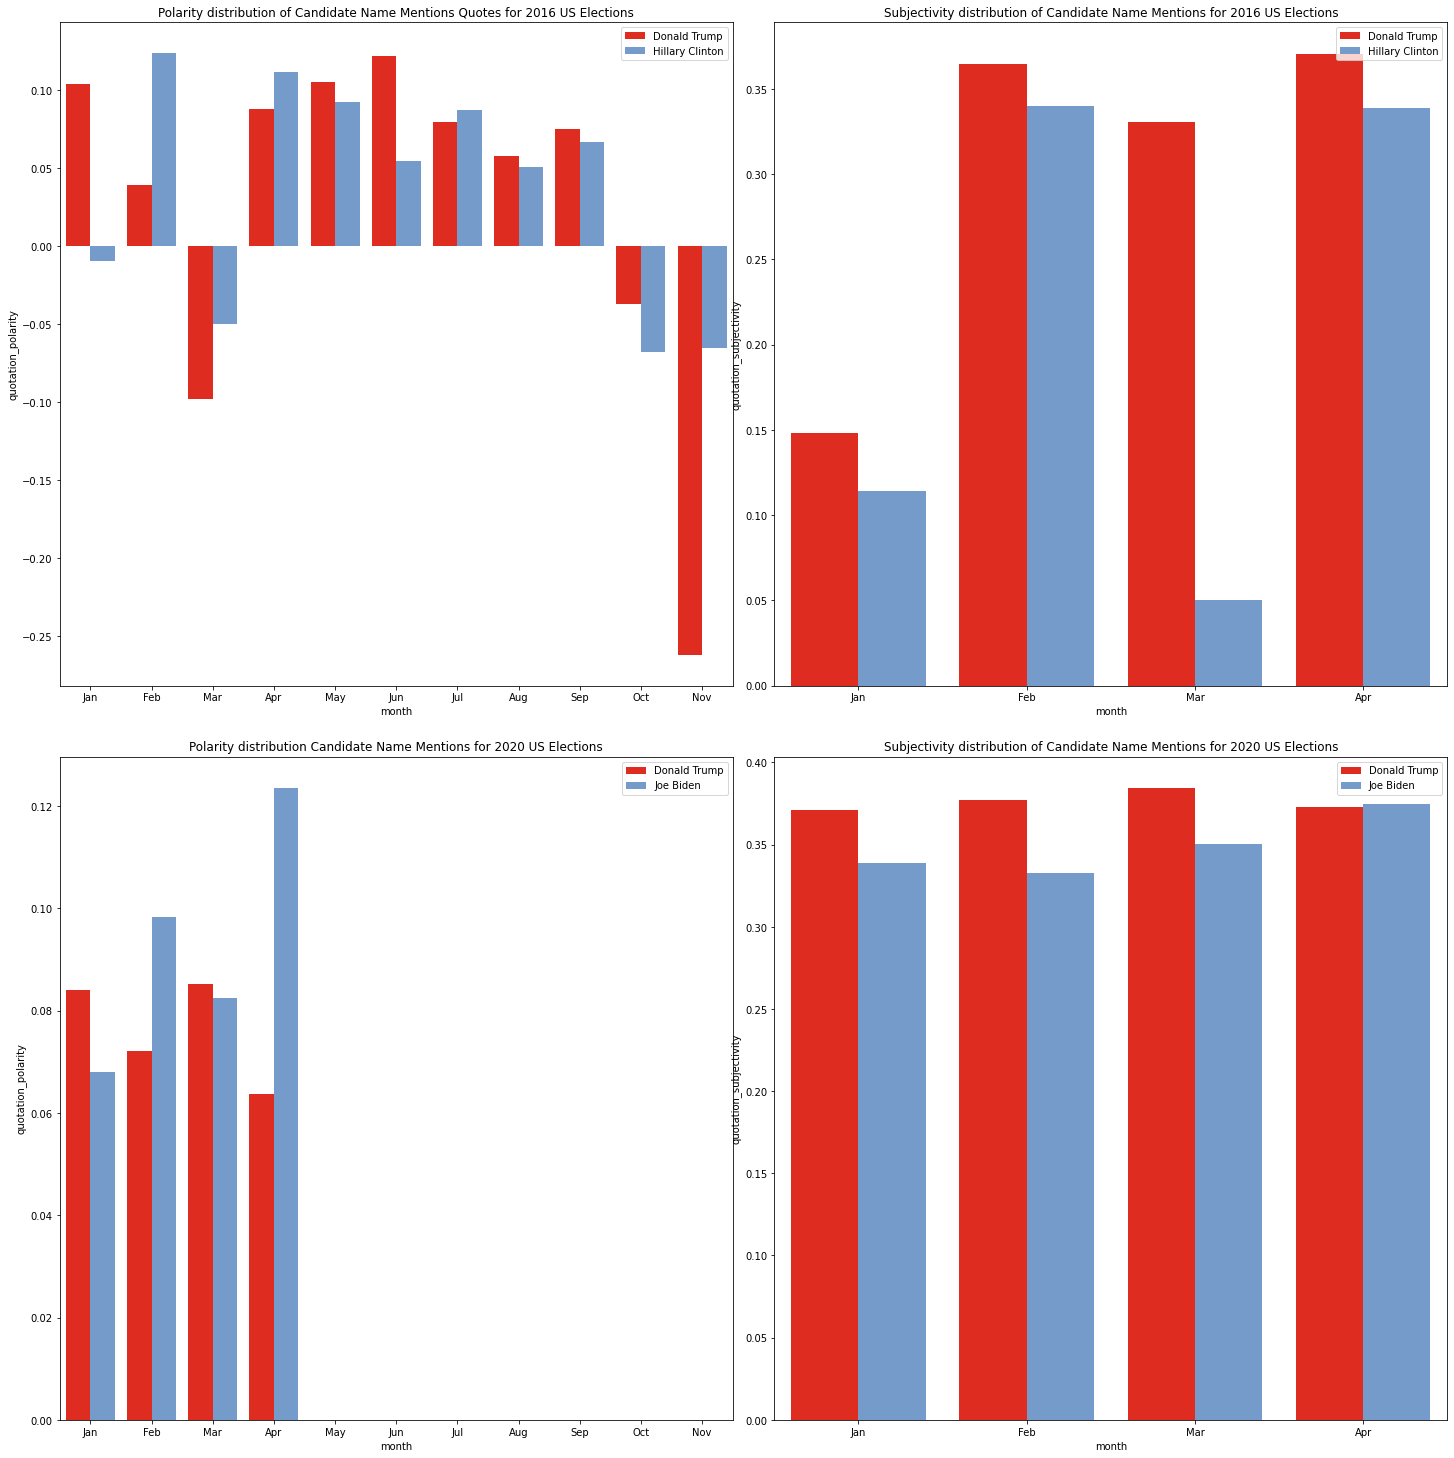

In [177]:
months_2016 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
months_2020 = ['Jan', 'Feb', 'Mar', 'Apr']
candidates_2016 = ['Donald Trump', 'Hillary Clinton']
candidates_2020 = ['Donald Trump', 'Joe Biden']

df_candidates_2016 = pd.concat([df_trump_2016_sa, df_clinton_2016_sa], ignore_index=True)
df_candidates_2020 = pd.concat([df_trump_2020_sa, df_biden_2020_sa], ignore_index=True)

df_candidates_2016_polarity_processed = preprocess_data_for_visualisation(df_candidates_2016, months_2016, candidates_2016)
df_candidates_2020_polarity_processed = preprocess_data_for_visualisation(df_candidates_2020, months_2020, candidates_2020)

df_candidates_2016_subjectivity_processed = preprocess_data_for_visualisation(df_candidates_2016, months_2016, candidates_2016, subjectivity=True)
df_candidates_2020_subjectivity_processed = preprocess_data_for_visualisation(df_candidates_2020, months_2020, candidates_2020, subjectivity=True)

fig, axs = plt.subplots(2, 2, figsize=(20,20))
fig.tight_layout(h_pad=5)

axs[0][0].set_title("Polarity distribution of Candidate Name Mentions Quotes for 2016 US Elections")
sns.barplot(x='month', y='quotation_polarity', estimator=np.mean, ci="sd", capsize=.2, data=df_candidates_2016_polarity_processed, hue="candidate", order=months_2016, ax=axs[0][0], palette=["#fe1100",'#6699d8'])
axs[0][0].legend(loc='upper right')
axs[1][0].set_title("Polarity distribution Candidate Name Mentions for 2020 US Elections")
sns.barplot(x='month', y='quotation_polarity', data=df_candidates_2020_polarity_processed, hue="candidate", order=months_2016, ax=axs[1][0], palette=["#fe1100",'#6699d8'])
axs[1][0].legend(loc='upper right')

axs[0][1].set_title("Subjectivity distribution of Candidate Name Mentions for 2016 US Elections")
sns.barplot(x='month', y='quotation_subjectivity', estimator=np.mean, ci="sd", capsize=.2, data=df_candidates_2016_subjectivity_processed, hue="candidate", order=months_2020, ax=axs[0][1], palette=["#fe1100",'#6699d8'])
axs[0][1].legend(loc='upper right')
axs[1][1].set_title("Subjectivity distribution of Candidate Name Mentions for 2020 US Elections")
sns.barplot(x='month', y='quotation_subjectivity', data=df_candidates_2020_subjectivity_processed, hue="candidate", order=months_2020, ax=axs[1][1], palette=["#fe1100",'#6699d8'])
axs[1][1].legend(loc='upper right')